Let try pythainlp NER Tagger first

In [1]:
from pythainlp.tag.named_entity import ThaiNameTagger

ner = ThaiNameTagger()
ner.get_ner("สนใจ honda jazz ขอรายละเอียดกับโปรโมชั่นหน่อยครับ จะออกรถประมาณเดือนกุมภาพันธ์ ผมอยู่แถวพระราม 2 มีโปรโมชั่นดีๆแนะนำ inbox มาได้เลยนะครับผม ขอบคุณครับ")


[('สนใจ', 'PROPN', 'O'),
 (' ', 'PUNCT', 'O'),
 ('honda', 'NOUN', 'O'),
 (' ', 'PUNCT', 'O'),
 ('jazz', 'NOUN', 'O'),
 (' ', 'PUNCT', 'O'),
 ('ขอ', 'VERB', 'O'),
 ('รายละเอียด', 'NOUN', 'O'),
 ('กับ', 'ADP', 'O'),
 ('โปรโมชั่น', 'NOUN', 'O'),
 ('หน่อย', 'ADJ', 'O'),
 ('ครับ', 'NOUN', 'O'),
 (' ', 'PUNCT', 'O'),
 ('จะ', 'AUX', 'O'),
 ('ออกรถ', 'VERB', 'O'),
 ('ประมาณ', 'DET', 'O'),
 ('เดือน', 'NOUN', 'O'),
 ('กุมภาพันธ์', 'NOUN', 'O'),
 (' ', 'PUNCT', 'O'),
 ('ผม', 'PRON', 'O'),
 ('อยู่', 'VERB', 'O'),
 ('แถว', 'NOUN', 'O'),
 ('พระราม', 'NOUN', 'O'),
 (' ', 'PUNCT', 'O'),
 ('2', 'NUM', 'O'),
 (' ', 'PUNCT', 'O'),
 ('มี', 'VERB', 'O'),
 ('โปรโมชั่น', 'NOUN', 'O'),
 ('ดี', 'ADJ', 'O'),
 ('ๆ', 'PUNCT', 'O'),
 ('แนะนำ', 'VERB', 'O'),
 (' ', 'PUNCT', 'O'),
 ('inbox', 'NOUN', 'O'),
 (' ', 'PUNCT', 'O'),
 ('มา', 'AUX', 'O'),
 ('ได้', 'AUX', 'O'),
 ('เลย', 'ADV', 'O'),
 ('นะ', 'NOUN', 'O'),
 ('ครับผม', 'NOUN', 'O'),
 (' ', 'PUNCT', 'O'),
 ('ขอบคุณ', 'VERB', 'O'),
 ('ครับ', 'NOUN', 'O')]

This notebook will try to build LSTM NER tagger in both word and character level

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

Import thai-named-entity-recognition-data from PyThaiNLP

In [3]:
import dill
with open('./datatrain.data', 'rb') as file:
 datatofile = dill.load(file)

In [4]:
datatofile[1]

[('สงสัย', 'NCMN', 'O'),
 ('ติด', 'VACT', 'O'),
 ('หวัด', 'NCMN', 'O'),
 ('นก', 'DDAC', 'O'),
 (' ', 'NCMN', 'O'),
 ('อีก', 'DDBQ', 'O'),
 ('คน', 'NCMN', 'O'),
 ('ยัง', 'XVBM', 'O'),
 ('น่า', 'VSTA', 'O'),
 ('ห่วง', 'NCMN', 'O')]

In [5]:
print("sentence",0)

sentence 0


In [6]:
list1=[]
list2=[]
list3=[]
list4=[]
sentences=[]
count = []
counter = 0
for i in datatofile:
    sentences.append(i)
    counter = counter+1
    word_count=0
    for j in i:
        list1.append(j[0])
        list2.append(j[1])
        list3.append(j[2])
        list4.append("sentence: "+ str(counter))
        word_count = word_count+1
    count.append(word_count)


We now have the word in list1, POS in list2, label in list3, and sentence number in list4

From the count array that was built to count number of word in a sentence we can visualize it

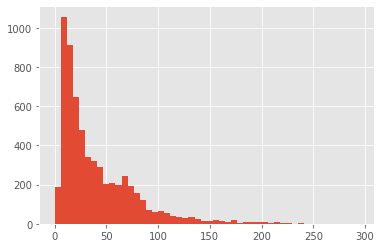

In [7]:
%matplotlib inline
plt.hist(count, bins = 50)
plt.show()  

In [8]:
from scipy import stats
stats.describe(count)

DescribeResult(nobs=6148, minmax=(0, 294), mean=40.21128822381262, variance=1411.682859378114, skewness=1.9048650236747016, kurtosis=4.760085043354304)

Put it in dataframe for visualization

In [9]:
df = pd.DataFrame(list(zip(list4, list1, list2, list3)), 
               columns =['sentence','Word','POS','label'])

In [10]:
(df['Word'].values == ' ').sum()  

39665

In [11]:
df.tail(20)

,sentence,Word,POS,label
247199,sentence: 6147,ประชามติ,VACT,I-LAW
247200,sentence: 6147,,NCMN,O
247201,sentence: 6147,วันนี้,NCMN,B-DATE
247202,sentence: 6147,ทั้ง,JCRG,O
247203,sentence: 6147,นายกฯ,NCMN,O
247204,sentence: 6147,และ,JCRG,O
247205,sentence: 6147,,NCMN,O
247206,sentence: 6147,รอง,VATT,O
247207,sentence: 6147,นายกฯ,NCMN,O
247208,sentence: 6147,ฝ่าย,NCMN,O


In [12]:
words = list(set(df["Word"].values))
n_words = len(words); n_words

14294

There are 14294 words in this data

In [13]:
tags = list(set(df["label"].values))
n_tags = len(tags); n_tags

26

There are 26 tags in the data set

The sentences array will be use

In [14]:
type(sentences)

list

In [15]:
sentences

[[('http', 'NCMN', 'B-URL'),
  ('://', 'NCMN', 'I-URL'),
  ('www', 'NCMN', 'I-URL'),
  ('.', 'PUNC', 'I-URL'),
  ('bangkokhealth', 'NCMN', 'I-URL'),
  ('.', 'PUNC', 'I-URL'),
  ('com', 'NCMN', 'I-URL'),
  ('/', 'NCMN', 'I-URL'),
  ('healthnews', 'NCMN', 'I-URL'),
  ('_', 'NCMN', 'I-URL'),
  ('htdoc', 'NCMN', 'I-URL'),
  ('/', 'NCMN', 'I-URL'),
  ('healthnews', 'NCMN', 'I-URL'),
  (' ', 'NCMN', 'I-URL'),
  ('_', 'NCMN', 'I-URL'),
  (' ', 'NCMN', 'I-URL'),
  ('detail', 'NCMN', 'I-URL'),
  ('.', 'PUNC', 'I-URL'),
  ('asp', 'NCMN', 'I-URL'),
  ('?', 'NCMN', 'I-URL'),
  ('Number', 'NCMN', 'I-URL'),
  ('=', 'NCMN', 'I-URL'),
  ('10506', 'NCNM', 'I-URL')],
 [('สงสัย', 'NCMN', 'O'),
  ('ติด', 'VACT', 'O'),
  ('หวัด', 'NCMN', 'O'),
  ('นก', 'DDAC', 'O'),
  (' ', 'NCMN', 'O'),
  ('อีก', 'DDBQ', 'O'),
  ('คน', 'NCMN', 'O'),
  ('ยัง', 'XVBM', 'O'),
  ('น่า', 'VSTA', 'O'),
  ('ห่วง', 'NCMN', 'O')],
 [('ตามที่', 'JSBR', 'O'),
  ('นาง', 'NTTL', 'B-PERSON'),
  ('ประนอม', 'NPRP', 'I-PERSON'),
  (' ', '

Prepare the data

Set the max length of the sentence to be 150 base on distribution of the legth of each sentence

In [16]:
max_len = 150
max_len_char = 10

In [17]:
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

Manually tokenize words and tag in the sentence and set word that generated from padding as 0 and unknown token(rare word) as 1 and do the same to label of each word

In [18]:
print(word2idx["ทั้ง"])

6588


In [19]:
print(word2idx["กรมอนามัย"])

4804


In [20]:
print(tag2idx["B-ORGANIZATION"])

13


Pad each sentence

In [21]:
from keras.preprocessing.sequence import pad_sequences
#Build sequence of each word
X_word = [[word2idx[w[0]] for w in s] for s in sentences]


Using TensorFlow backend.


In [22]:
X_word = pad_sequences(maxlen=max_len, sequences=X_word, value=word2idx["PAD"], padding='post', truncating='post')

Now we pad each character too to try and deal with unknown word

In [23]:
chars = set([w_i for w in words for w_i in w])
n_chars = len(chars)
print(n_chars)

177


In [24]:
char2idx = {c: i + 2 for i, c in enumerate(chars)}
char2idx["UNK"] = 1
char2idx["PAD"] = 0

In [25]:
X_char = []
for sentence in sentences:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    X_char.append(np.array(sent_seq))

pad each label too

In [26]:
y = [[tag2idx[w[2]] for w in s] for s in sentences]

In [27]:
y = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')

Split the data

In [28]:
from sklearn.model_selection import train_test_split
X_word_tr, X_word_te, y_tr, y_te = train_test_split(X_word, y, test_size=0.2, random_state=42)
X_char_tr, X_char_te, _, _ = train_test_split(X_char, y, test_size=0.2, random_state=42)

In [29]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, SpatialDropout1D, GlobalMaxPooling1D

Because my version of keras has some problem with accuracy metric, I have to use custom accuracy metric instead

In [30]:
from keras import backend as K

def sparse_categorical_accuracy(y_true, y_pred):
    # reshape in case it's in shape (num_samples, 1) instead of (num_samples,)
    if K.ndim(y_true) == K.ndim(y_pred):
        y_true = K.squeeze(y_true, -1)
    # convert dense predictions to labels
    y_pred_labels = K.argmax(y_pred, axis=-1)
    y_pred_labels = K.cast(y_pred_labels, K.floatx())
    return K.cast(K.equal(y_true, y_pred_labels), K.floatx())

Considering state of the art Thai NER LSTM-CRF has been implemented already with this data set, I want to implemented different model

Bulid a model using LSTM, this model treat NER problem as time distributed problem, and add idividual character embedded level to try and deal with unknown word by prefix, suffix

In [31]:
# input and embedding for words
word_in = Input(shape=(max_len,))
emb_word = Embedding(input_dim=n_words + 2, output_dim=20,
                     input_length=max_len, mask_zero=True)(word_in)

# input and embeddings for characters
char_in = Input(shape=(max_len, max_len_char,))
emb_char = TimeDistributed(Embedding(input_dim=n_chars + 2, output_dim=10,
                           input_length=max_len_char, mask_zero=True))(char_in)
# character LSTM to get word encodings by characters
char_enc = TimeDistributed(LSTM(units=20, return_sequences=False,
                                recurrent_dropout=0.5))(emb_char)

# main LSTM
x = concatenate([emb_word, char_enc])
x = SpatialDropout1D(0.3)(x)
main_lstm = Bidirectional(LSTM(units=50, return_sequences=True,
                               recurrent_dropout=0.6))(x)
out = TimeDistributed(Dense(n_tags + 1, activation="softmax"))(main_lstm)

model = Model([word_in, char_in], out)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=[sparse_categorical_accuracy])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 10)      0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 150)          0                                            
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 150, 10, 10)  1790        input_2[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embeddin

In [32]:
from keras.callbacks import ModelCheckpoint
filepath="LSTM_NER_best_weights.{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit([X_word_tr,
                     np.array(X_char_tr).reshape((len(X_char_tr), max_len, max_len_char))],
                    np.array(y_tr).reshape(len(y_tr), max_len, 1),
                    batch_size=32, epochs=20, validation_split=0.2, verbose=2, callbacks = [checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 3934 samples, validate on 984 samples
Epoch 1/20
 - 60s - loss: 1.4432 - sparse_categorical_accuracy: 0.7806 - val_loss: 0.9580 - val_sparse_categorical_accuracy: 0.7934

Epoch 00001: val_loss improved from inf to 0.95796, saving model to LSTM_NER_best_weights.01-0.9580.hdf5
Epoch 2/20
 - 54s - loss: 0.8599 - sparse_categorical_accuracy: 0.7944 - val_loss: 0.7444 - val_sparse_categorical_accuracy: 0.8041

Epoch 00002: val_loss improved from 0.95796 to 0.74445, saving model to LSTM_NER_best_weights.02-0.7444.hdf5
Epoch 3/20
 - 55s - loss: 0.6645 - sparse_categorical_accuracy: 0.8215 - val_loss: 0.6037 - val_sparse_categorical_accuracy: 0.8337

Epoch 00003: val_loss improved from 0.74445 to 0.60374, saving model to LSTM_NER_best_weights.03-0.6037.hdf5
Epoch 4/20
 - 56s - loss: 0.5412 - sparse_categorical_accuracy: 0.8487 - val_loss: 0.5126 - val_sparse_categorical_accuracy: 0.8539

Epoch 00004: val_loss improved from 0.60374 to 0.5

Plot the graph 

KeyError: 'val_acc'

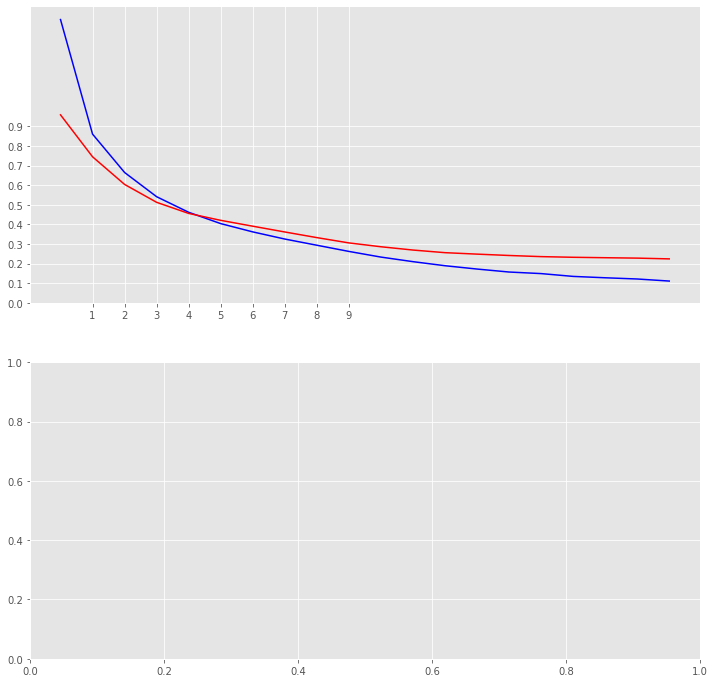

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 10, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 10, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()
K.clear_session()

In [34]:
y_pred = model.predict([X_word_te,
                        np.array(X_char_te).reshape((len(X_char_te),
                                                     max_len, max_len_char))])

These are some of the example of prediction of the validation set

In [35]:
i = 856
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_word_te[i], y_te[i], p):
    if w != 0:
        print("{:15}: {:5} {}".format(idx2word[w], idx2tag[t], idx2tag[pred]))

Word           ||True ||Pred
ตำรวจ          : O     O
ให้            : O     O
ประกันตัว      : O     O
อาจารย์        : O     O
               : O     O
มหาวิทยาลัย    : O     O
แห่ง           : O     O
หนึ่ง          : O     O
ใน             : O     O
จ.             : B-LOCATION B-LOCATION
พระนครศรีอยุธยา: I-LOCATION I-LOCATION
               : O     O
วงเงิน         : O     O
               : O     O
150,000        : B-MONEY B-MONEY
               : I-MONEY I-MONEY
บาท            : I-MONEY I-MONEY
               : O     O
หลัง           : O     O
ถูก            : O     O
กล่าวหา        : O     O
จาก            : O     O
นักศึกษา       : O     O
ว่า            : O     O
ขอ             : O     O
มีเพศสัมพันธ์  : O     O
เพื่อ          : O     O
แลก            : O     O
เกรด           : O     O
               : O     O
โดย            : O     O
มหาวิทยาลัย    : O     O
               : O     O
สั่ง           : O     O
พักงาน         : O     O
               : O     O
เพื่อ          : O 

Load the test data

In [36]:
neg = pd.read_csv('./Data/neg.txt', header = None, sep = "\t", names = ["text"])

pos = pd.read_csv('./Data/pos.txt', header = None, sep = "\t", names = ["text"])

neu = pd.read_csv('./Data/neu.txt', header = None, sep = "\t", names = ["text"])

q = pd.read_csv('./Data/q.txt', header = None, sep = "\t", names = ["text"])

In [37]:
test_df = pd.concat([neg, neu, pos, q]) 

In [38]:
test_df

,text
0,😔
1,😞
2,😥
3,รำ
4,Noๆ
5,Rip
6,T_T
7,กาก
8,โกง
9,ควย


In [39]:
import deepcut
def split_words (sentence):
    return deepcut.tokenize(sentence)

Split the test set

In [40]:
test_df['text'] = test_df['text'].apply(lambda x: split_words(x))

In [41]:
test_df

,text
0,[😔]
1,[😞]
2,[😥]
3,[รำ]
4,"[No, ๆ]"
5,[Rip]
6,[T_T]
7,[กาก]
8,[โกง]
9,[ควย]


In [42]:
test_df.shape

(28055, 1)

In [44]:
from pythainlp.tag import pos_tag
pos_tag(test_df.iloc[546][0], corpus='orchid_ud')

[('เป็น', 'VERB'),
 ('ไร', 'NOUN'),
 ('อะ', 'NOUN'),
 (' ', 'PUNCT'),
 ('ด่าตลอด', 'NOUN'),
 (' ', 'PUNCT'),
 ('รำ', 'NOUN')]

Tag the POS to the test set

In [45]:

def POS_tagging (sentence):
    return pos_tag(sentence , corpus ='orchid_ud')

In [46]:
t = test_df['text'].map(lambda x: POS_tagging(x))

Put the test set into usable form

In [47]:
testdata = t.to_numpy()

In [48]:
testdata = list(testdata)

In [49]:
testdata

[[('😔', 'NOUN')],
 [('😞', 'NOUN')],
 [('😥', 'NOUN')],
 [('รำ', 'NOUN')],
 [('No', 'NOUN'), ('ๆ', 'PUNCT')],
 [('Rip', 'NOUN')],
 [('T_T', 'NOUN')],
 [('กาก', 'NOUN')],
 [('โกง', 'NOUN')],
 [('ควย', 'NOUN')],
 [('แพง', 'NOUN')],
 [('ยาก', 'ADJ')],
 [('เลว', 'NOUN')],
 [('😣', 'NOUN'), ('😣', 'NOUN')],
 [('ควย', 'NOUN'), ('ๆ', 'PUNCT')],
 [('จริง', 'ADV')],
 [('ชุ่ย', 'NOUN')],
 [('เซ็ง', 'NOUN')],
 [('ไม่', 'PART'), ('ๆ', 'PUNCT')],
 [('รำ', 'NOUN'), ('😑', 'NOUN')],
 [('จิงคะ', 'NOUN')],
 [('ตอแหล', 'NOUN')],
 [('โน', 'NOUN'), ('ๆ', 'PUNCT'), ('ๆ', 'NOUN'), ('ๆ', 'PUNCT')],
 [('บ่', 'PROPN'), (' ', 'PUNCT'), ('👿', 'NOUN')],
 [('ผอมมม', 'NOUN')],
 [('เสือก', 'NOUN')],
 [('อีก', 'DET'), ('ละ', 'VERB')],
 [('อีสัส', 'NOUN')],
 [('ไอสัด', 'NOUN')],
 [('😣', 'NOUN'), ('😣', 'NOUN'), ('😣', 'NOUN')],
 [('Nooooo', 'NOUN')],
 [('กวนตีน', 'NOUN')],
 [('จะ', 'AUX'), ('อ๊วก', 'VERB')],
 [('ตัง', 'NOUN'), ('ค่ะ', 'NOUN')],
 [('บ่อยาก', 'PROPN')],
 [('บ่อิ่ม', 'PROPN')],
 [('พอ', 'SCONJ'), ('เหอะ', 'NOUN

Tokenize the word

In [50]:
test_word = []
for s in testdata:
    sen_seq = []
    for w in s:
        try:
            sen_seq.append(word2idx[w[0]])
        except:
            sen_seq.append(word2idx['UNK'])
    test_word.append(sen_seq)
            
        

In [51]:
word2idx['งง']

5480

In [52]:
test_word

[[1],
 [1],
 [1],
 [1],
 [8697, 7408],
 [1],
 [1],
 [4459],
 [1595],
 [1],
 [478],
 [8414],
 [1],
 [1, 1],
 [1, 7408],
 [5647],
 [1],
 [4741],
 [8988, 7408],
 [1, 1],
 [1],
 [1],
 [553, 7408, 7408, 7408],
 [1, 14097, 1],
 [1],
 [1],
 [13466, 7940],
 [1],
 [1],
 [1, 1, 1],
 [1],
 [1],
 [1344, 1],
 [8155, 12288],
 [1],
 [1],
 [8186, 1],
 [478, 1],
 [1],
 [478, 402],
 [8988, 14097, 4486, 4486],
 [8988, 6850],
 [8988, 1487, 4486],
 [8988, 1],
 [8988, 12058],
 [1],
 [6141, 3042],
 [1],
 [1542, 11116],
 [1],
 [12553],
 [13370, 1],
 [1],
 [1],
 [1],
 [9124, 1],
 [1],
 [1],
 [12274, 6141],
 [1],
 [1],
 [1],
 [8841, 4090],
 [2776, 7940],
 [1, 1],
 [1, 10743],
 [478, 8710],
 [118, 1],
 [10037, 1],
 [8988, 1487, 7940],
 [1],
 [1, 8690, 8173],
 [1, 14097, 8988],
 [6785, 7408, 11207],
 [1],
 [1],
 [1],
 [1, 4793],
 [1, 12238],
 [6722, 13466, 7940],
 [1],
 [1, 6494],
 [2994, 1],
 [7730, 3060],
 [1],
 [1],
 [1],
 [3795, 1],
 [1],
 [8186, 4448, 1531],
 [478, 1],
 [1, 7196],
 [8988, 9124, 6640],
 [8988

In [53]:
test_word = pad_sequences(maxlen=max_len, sequences=test_word, value=word2idx["PAD"], padding='post', truncating='post')

Tokenize the character

In [54]:
test_char = []
for sentence in testdata:
    sent_seq = []
    for i in range(max_len):
        word_seq = []
        for j in range(max_len_char):
            try:
                word_seq.append(char2idx.get(sentence[i][0][j]))
            except:
                word_seq.append(char2idx.get("PAD"))
        sent_seq.append(word_seq)
    test_char.append(np.array(sent_seq))

In [55]:
test_pred = model.predict([test_word,
                        np.array(test_char).reshape((len(test_char),
                                                     max_len, max_len_char))])

These are some of the example of prediction of the test set

In [56]:
i = 28042
p = np.argmax(test_pred[i], axis=-1)
print("{:15}||{}".format("Word", "Pred"))
print(30 * "=")
for w, pred in zip(test_word[i], p):
    if w != 0:
        print("{:15}: {}".format(idx2word[w], idx2tag[pred]))

Word           ||Pred
สนใจ           : O
               : O
UNK            : O
               : O
UNK            : O
               : O
ขอ             : O
รายละเอียด     : O
กับ            : O
โปรโมชั่น      : O
หน่อย          : O
ครับ           : O
               : O
จะ             : O
ออก            : O
รถ             : O
ประมาณ         : O
เดือน          : O
กุมภาพันธ์     : B-DATE
               : O
ผม             : O
อยู่           : O
แถว            : O
UNK            : O
               : O
มี             : O
โปรโมชั่น      : O
ดี             : O
ๆ              : O
แนะนำ          : O
               : O
UNK            : O
               : O
มา             : O
ได้            : O
เลย            : O
นะ             : O
ครับ           : O
ผม             : O
               : O
ขอบคุณ         : O
ครับ           : O


The prediction made by the model does not perform well like in validation set, this is probably due to the different between training set and test set.

Turn prediction into usable form

In [57]:
t_pred = []
for i in range(len(test_pred)):
    t_pred.append(np.argmax(test_pred[i], axis=-1))

In [58]:
idx2tag[13]

'B-ORGANIZATION'

For example these are some of word that has been predict to be organization

In [59]:
org = []
for i,w in zip(t_pred,test_word):
    for j,x in zip(i,w):
        if (j == 13 and x!=0 and x!=1):
            org.append(idx2word[x])

In [60]:
set(org)

{'.',
 '1',
 '3',
 '4',
 '@',
 'A',
 'AIS',
 'Apple',
 'BNK',
 'BTS',
 'DNA',
 'Director',
 'E',
 'Energy',
 'Facebook',
 'Google',
 'IBM',
 'Innovation',
 'KFC',
 'LG',
 'Rescue',
 'Thai',
 'ThaiPBS',
 'The',
 'Time',
 'Twitter',
 'UN',
 'United',
 'WD',
 'Workpoint',
 'X',
 'in',
 'ก',
 'ก.',
 'กก',
 'กกต.',
 'กกท.',
 'กฎหมาย',
 'กฏ',
 'กฏหมาย',
 'กด',
 'กทม.',
 'กบ',
 'กม',
 'กม.',
 'กย',
 'กรม',
 'กรมการขนส่งทางบก',
 'กรมการปกครอง',
 'กรมการแพทย์',
 'กรมบัญชีกลาง',
 'กรมสรรพากร',
 'กรมอนามัย',
 'กระทรวง',
 'กระทรวงการคลัง',
 'กระทรวงคมนาคม',
 'กระทรวงพาณิชย์',
 'กระทรวงมหาดไทย',
 'กระทรวงศึกษาธิการ',
 'กระทรวงสาธารณสุข',
 'กราบบังคมทูล',
 'กรุงศรี',
 'กลิ่น',
 'กลุ่ม',
 'กสทช.',
 'กสิกร',
 'กอ.รมน.',
 'กอง',
 'กองทัพอากาศ',
 'กันแดด',
 'กัปตัน',
 'การ',
 'กำแพงเพชร',
 'กำไร',
 'กิ',
 'กิจกรรม',
 'กิน',
 'กิ่ง',
 'กุ้ง',
 'กูเกิล',
 'กูเกิ้ล',
 'ก้อย',
 'ขนม',
 'ขยัน',
 'ขวัญ',
 'ขสมก.',
 'ขาว',
 'ข้าง',
 'คณะ',
 'คณะเภสัชศาสตร์',
 'คม',
 'คมนาคม',
 'คราว',
 'คสช.',
 'คอ',
 'คาบ',
 

What to do in the future

Considering CRF-LSTM has been establish as state of the art model adding CRF layer into the model would yield better result. Use non formal dataset would generate better result also.